SARIMAX forecasting practice 
Datasets used
    Nuitées dans l'hôtellerie - Total - Pays de la Loire https://www.insee.fr/fr/statistiques/serie/001711049

In [394]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pyramid
%matplotlib inline

In [399]:
dn = pd.read_csv('datasets/valeurs_mensuelles.csv', sep=";", names=["Date","Nights"],index_col=[0], parse_dates=[0],usecols=[0, 1],skiprows=range(0, 3),header=None)
dn.head()

,Nights
Date,
2018-06-01,772.50
2018-05-01,691.32
2018-04-01,640.27
2018-03-01,519.03
2018-02-01,447.08


<Figure size 432x288 with 0 Axes>

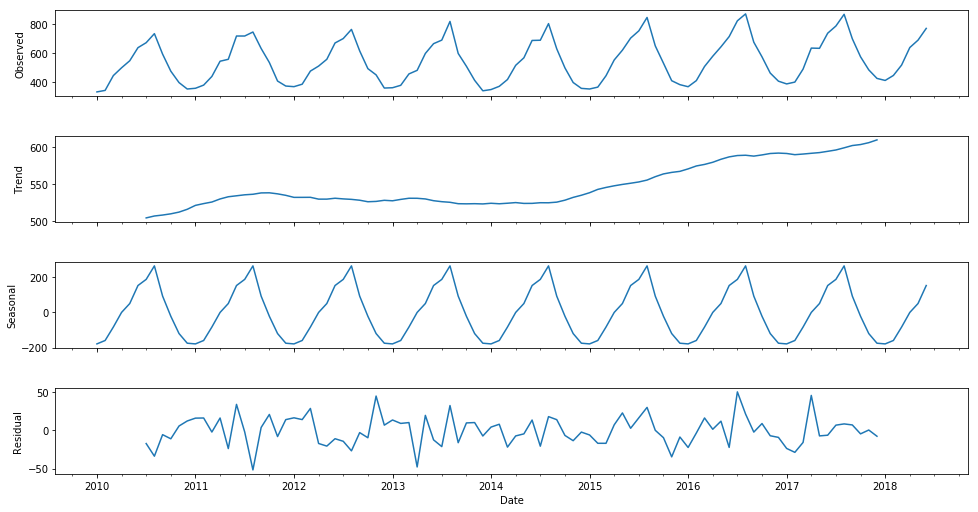

In [396]:
decomposition = seasonal_decompose(dn.Nights, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [388]:
from pyramid.arima import auto_arima
y = np.array(dn.Nights)
tc_fit = auto_arima(y, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True, n_jobs=-1, d=1, D=1, trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=False, random=True, random_state=42,  # we can fit a random search (not exhaustive)
                    n_fits=25)

tc_fit.summary()

Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=832.869, BIC=850.290, Fit time=2.060 seconds
Fit ARIMA: order=(2, 1, 2) sea

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 12)   Log Likelihood                -408.630
Date:                            Fri, 10 Aug 2018   AIC                            831.260
Time:                                    17:11:29   BIC                            848.680
Sample:                                         0   HQIC                           838.281
                                            - 102                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4154      1.236      0.336      0.737      -2.006       2.837
ar.L1         -1.1923      0.172     -6.943      0.000      -1.529      -0.856
ar.L2         -0.2765      0.158     -1.755      0.079      -0.585       0.032
ma.L1          0.3673      0.189      1.944      0.052      -0.003       0.738
ma.L2         -0.6102      0.151     -4.052      0.000      -0.905      -0.315
ma.S.L12      -0.4535      0.116     -3.903      0.000      -0.681      -0.226
sigma2       536.7881    101.422      5.293      0.000     338.004     735.572
===================================================================================
Ljung-Box (Q):                       38.92   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.52   Prob(JB):                         0.65
Heteroskedasticity (H):               1.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [198]:
next_12 = rs_fit.predict(n_periods=12)
next_12

array([832.52992255, 909.88436667, 729.99748417, 612.95326201,
       513.48652441, 459.76641979, 446.35735279, 474.54731509,
       554.34040484, 672.36699134, 714.0218858 , 801.66626974])

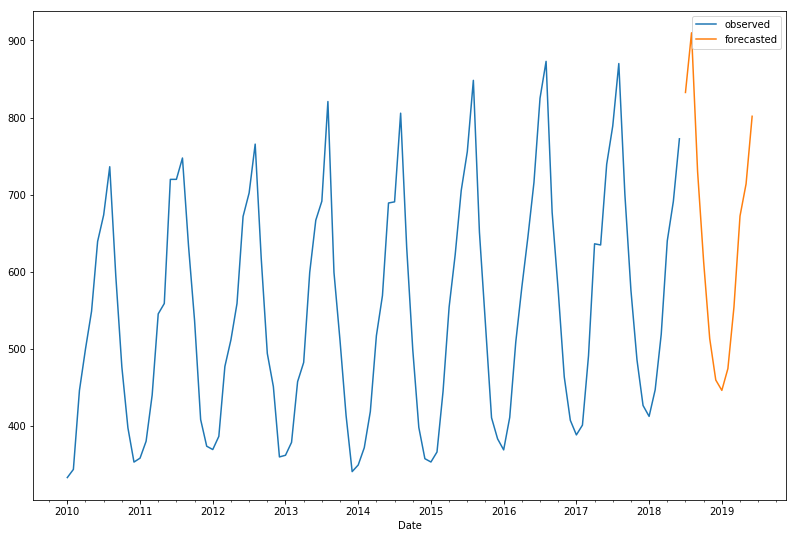

In [392]:
dn.Nights.plot(figsize=(13.5,9),label='observed')
nm12= pd.date_range(start='2018-07-01', end='2019-06-01', freq='MS')  
df = pd.DataFrame({'Date': nm12, 'Nights': next_12})
df = df.set_index('Date')
df.Nights.plot(label='forecasted')
plt.legend()
plt.show()


In [398]:
#N_ = data_nights[(data_nights.index>='2016-01-01')]
N_ = dn.Nights
y_ = np.array(N_)
stepwise_model = auto_arima(y, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

stepwise_model.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=829.718, BIC=842.161, Fit time=0.600 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=899.012, BIC=903.989, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=851.066, BIC=861.020, Fit time=0.553 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=829.307, BIC=839.262, Fit time=0.395 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=830.318, BIC=842.761, Fit time=0.978 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=844.781, BIC=852.247, Fit time=0.121 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=873.130, BIC=880.596, Fit time=0.327 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=829.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -410.654
Date:                            Fri, 10 Aug 2018   AIC                            829.307
Time:                                    17:26:13   BIC                            839.262
Sample:                                         0   HQIC                           833.320
                                            - 102                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1634      0.350      0.467      0.640      -0.522       0.849
ma.L1         -0.7637      0.075    -10.197      0.000      -0.910      -0.617
ma.S.L12      -0.5355      0.099     -5.386      0.000      -0.730      -0.341
sigma2       563.5869     99.165      5.683      0.000     369.228     757.946
===================================================================================
Ljung-Box (Q):                       45.52   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.25   Prob(JB):                         0.60
Heteroskedasticity (H):               1.57   Skew:                            -0.12
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""